In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sys

In [ ]:
data=pd.read_csv("STELLARHOSTS.csv")
df=pd.DataFrame(data)



In [5]:
df.replace("NULL", np.nan, inplace=True)


In [6]:
for col in ["st_teff","st_rad","st_mass","st_met","st_logg","sy_dist",
            "sy_vmag","sy_kmag","sy_gaiamag","sy_pnum","sy_snum"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with too many NaNs
df = df.dropna(subset=["st_teff","st_rad","st_mass","sy_dist","sy_pnum"], how="any")

# Histogram of Stellar Temperature

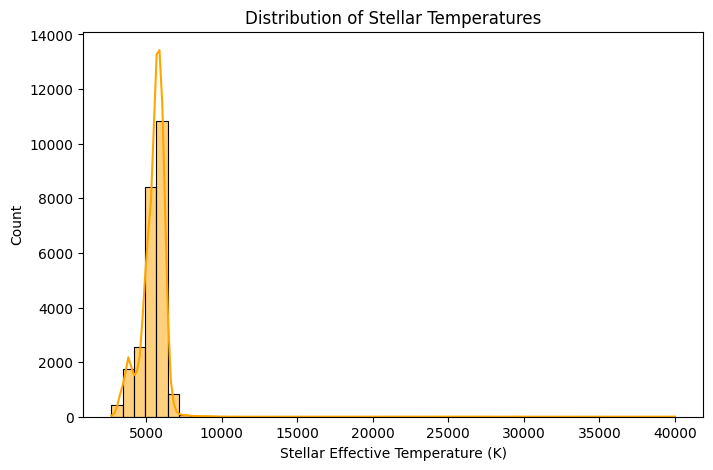

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["st_teff"], bins=50, color="orange", kde=True)
plt.xlabel("Stellar Effective Temperature (K)")
plt.title("Distribution of Stellar Temperatures")
plt.show()


# HR-like Diagram (Teff vs Radius)

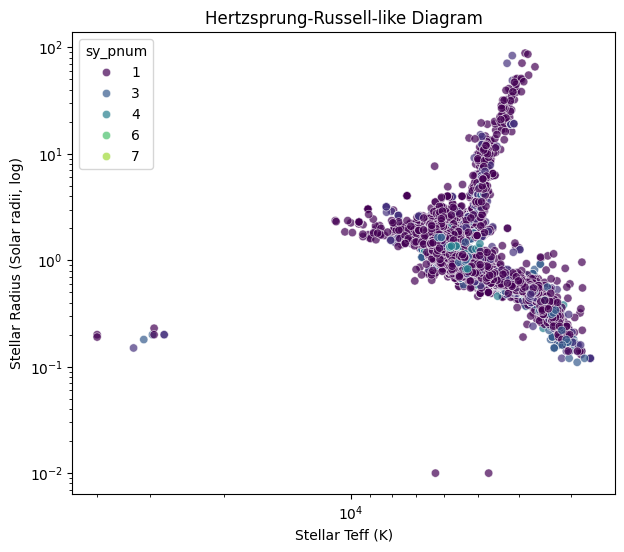

In [8]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="st_teff", y="st_rad", data=df, hue="sy_pnum", palette="viridis", alpha=0.7)
plt.gca().invert_xaxis() # HR diagram convention
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Stellar Teff (K)")
plt.ylabel("Stellar Radius (Solar radii, log)")
plt.title("Hertzsprung-Russell-like Diagram")
plt.show()

# Number of Planets per System

C:\Users\saqib\AppData\Local\Temp\ipykernel_6212\672074880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sy_pnum", data=df, palette="mako")


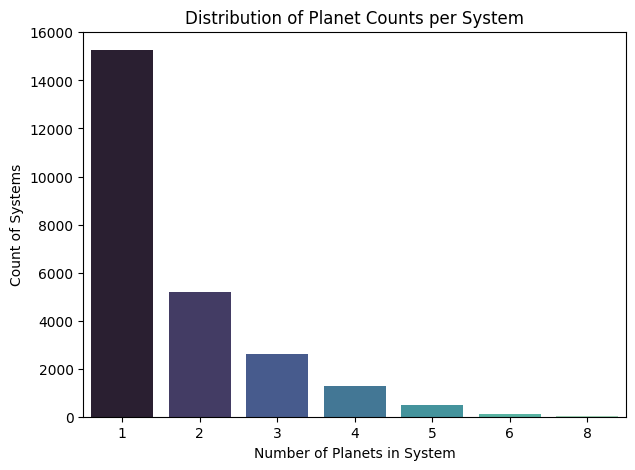

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x="sy_pnum", data=df, palette="mako")
plt.xlabel("Number of Planets in System")
plt.ylabel("Count of Systems")
plt.title("Distribution of Planet Counts per System")
plt.show()

Distance Distribution

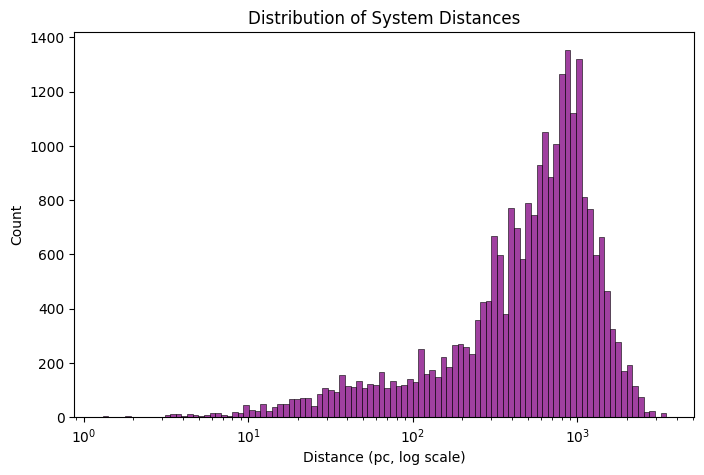

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["sy_dist"], bins=100, color="purple", log_scale=True)
plt.xlabel("Distance (pc, log scale)")
plt.title("Distribution of System Distances")
plt.show()

# RA vs Dec (Sky Distribution)

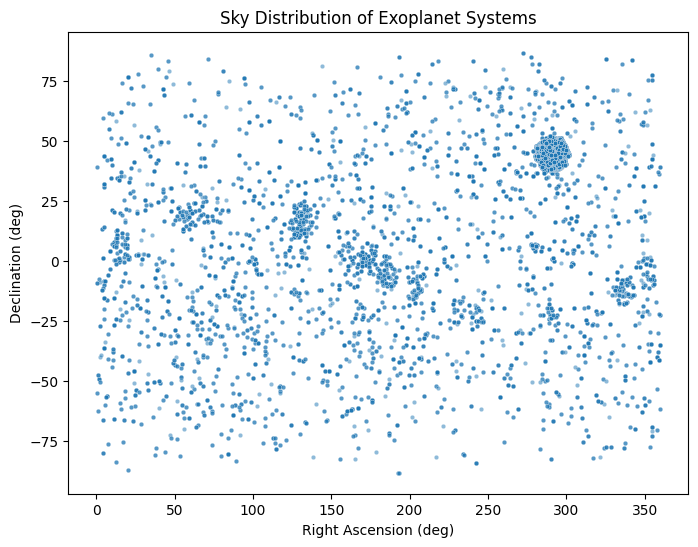

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="ra", y="dec", data=df, alpha=0.5, s=10)
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Sky Distribution of Exoplanet Systems")
plt.show()

# heatmap

In [12]:
# Correlation heatmap (numeric features only)
numeric_cols = ["st_teff","st_rad","st_mass","st_met","st_logg",
                "sy_dist","sy_vmag","sy_kmag","sy_gaiamag","sy_pnum"]

corr = df[numeric_cols].corr()

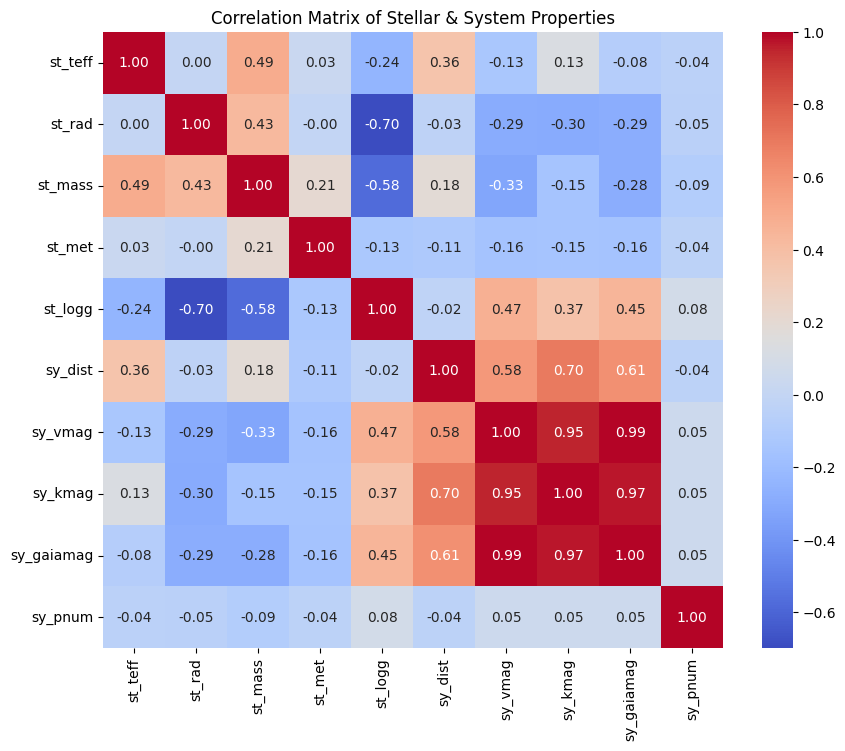

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Stellar & System Properties")
plt.show()

# Boxplots for categorical comparison

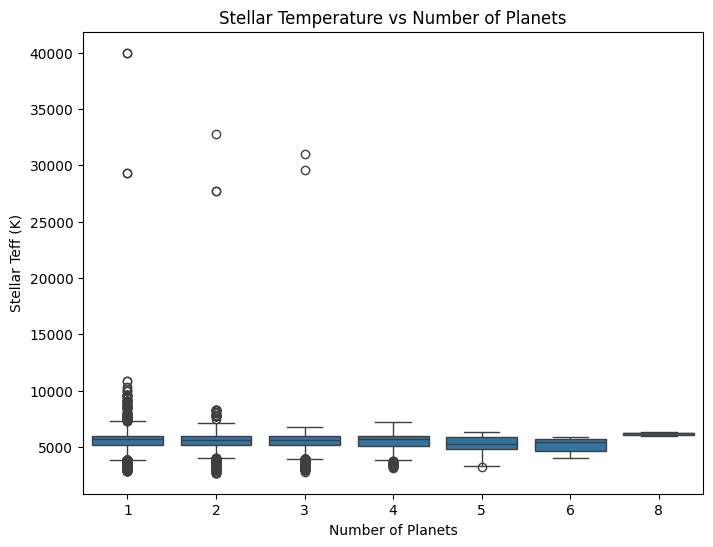

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="sy_pnum", y="st_teff", data=df)
plt.title("Stellar Temperature vs Number of Planets")
plt.xlabel("Number of Planets")
plt.ylabel("Stellar Teff (K)")
plt.show()

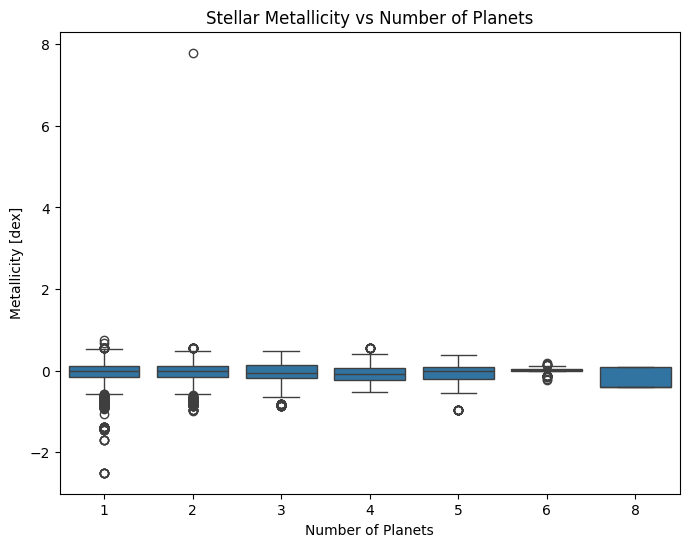

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="sy_pnum", y="st_met", data=df)
plt.title("Stellar Metallicity vs Number of Planets")
plt.xlabel("Number of Planets")
plt.ylabel("Metallicity [dex]")
plt.show()